In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
rho_r=np.abs(np.round(np.arange(1,0-0.01,-0.05),2))
rho_x=np.abs(np.round(np.arange(1,0-0.01,-0.05),2))

tol=1e-9

In [3]:
def var(c,h,p):
    """give  inputs as (last 1000 times steps , no. of species) eg:h has dimension (1000,100) it takes variance along axis 0 gives h(100)"""
    var_c,var_h,var_p = np.var(c,axis=0),np.var(h,axis=0),np.var(p,axis=0)
    mean_var_c,mean_var_h,mean_var_p = np.mean(var_c),np.mean(var_h),np.mean(var_p)
    return (mean_var_c,mean_var_h,mean_var_p)

In [28]:
# ccv=np.zeros((21,21))
# hhv=np.zeros((21,21))
# ppv=np.zeros((21,21))

#Initialize arrays with NaN
ccv = np.full((21, 21), np.nan)
hhv = np.full((21, 21), np.nan)
ppv = np.full((21, 21), np.nan)

for i in range(len(rho_r)):
    for j in range(len(rho_x)):
        #print(20-i,20-j)
        filename = f'rho_x={rho_x[j]}__rho_r={rho_r[i]}.npz'
        try:
            data = np.load(filename)
            h = data['h']
            c = data['c']
            p = data['p']
            # print(c.T[500:,:,0].shape)
            #print(f"{filename} loaded: h.shape = {h.shape}")
            n = c.shape[0]
            d=[] #variance of carnivores
            e=[] #variance of herbivores
            f=[] #variance of producers
            
            for k in range(0,n):
                d1,e1,f1=var(c.T[500:,:,k],h.T[500:,:,k],p.T[500:,:,k])
                d.append(d1)
                e.append(e1)
                f.append(f1)
            # is_greater = np.any(d > 1e-2)

            # print(is_greater)
            d=np.array(d)
            e=np.array(e)
            f=np.array(f)
            indicesd = np.where(d > 5*tol)[0]
            indicese = np.where(e > 5*tol)[0]
            indicesf = np.where(f > 5*tol)[0]
            
            
            mean_prob_carni=1-(len(indicesd)/n)
            
            mean_prob_herbi=1-(len(indicese)/n)
            mean_prob_prod=1-(len(indicesf)/n)
            ccv[20-i][20-j]=mean_prob_carni
            hhv[20-i][20-j]=mean_prob_herbi
            ppv[20-i][20-j]=mean_prob_prod
            
        except FileNotFoundError:
            #print(f"{filename} not found, skipping.")
            continue


/tmp/ipykernel_51364/2860396125.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues_r').copy()


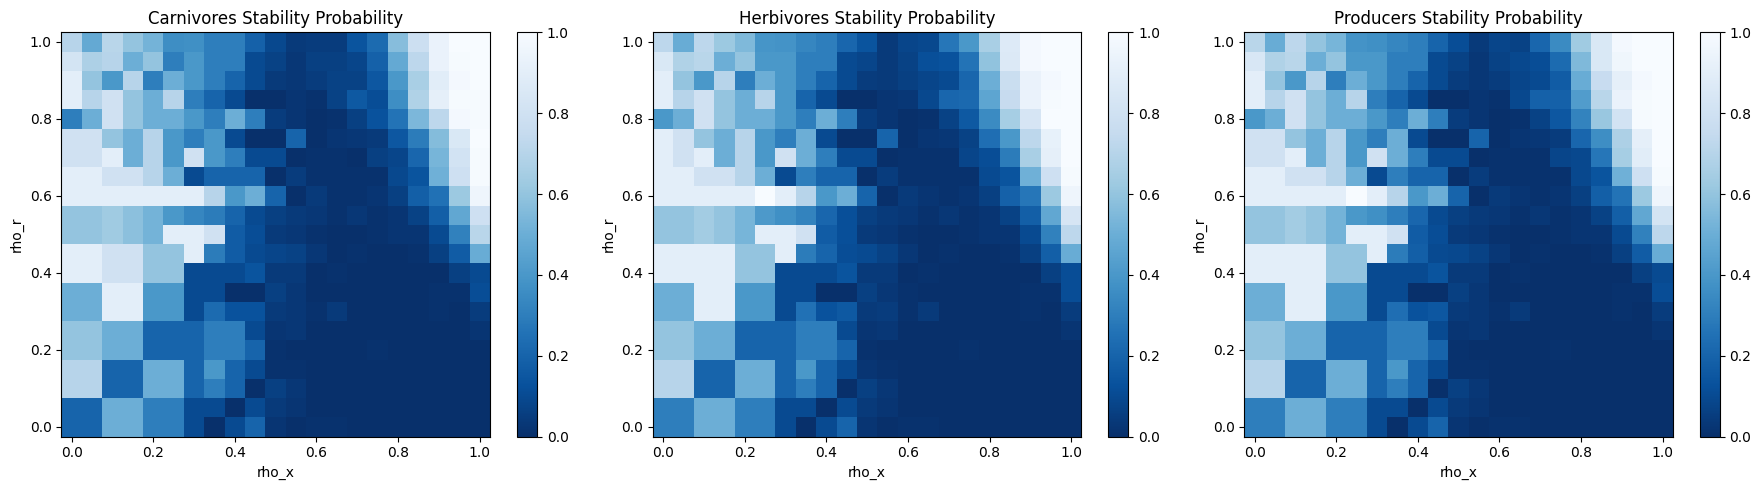

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create the rho_x and rho_r arrays
rho_x = np.linspace(0, 1, 21)
rho_r = np.linspace(0, 1, 21)
X, Y = np.meshgrid(rho_x, rho_r)  # X: rho_x (columns), Y: rho_r (rows)

# Mask missing values (NaNs will be masked)
masked_ccv = np.ma.masked_invalid(ccv)
masked_hhv = np.ma.masked_invalid(hhv)
masked_ppv = np.ma.masked_invalid(ppv)

# Create colormap with white for missing values
cmap = cm.get_cmap('Blues_r').copy()
cmap.set_bad(color='white')

# Create 1 row, 3 columns of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles = ['Carnivores', 'Herbivores', 'Producers']
data_list = [masked_ccv, masked_hhv, masked_ppv]

for ax, data, title in zip(axes, data_list, titles):
    im = ax.pcolormesh(X, Y, data, cmap=cmap, shading='auto')
    ax.set_title(f"{title} Stability Probability")
    ax.set_xlabel("rho_x")
    ax.set_ylabel("rho_r")
    fig.colorbar(im, ax=ax)

#plt.grid()
plt.tight_layout()
plt.show()


In [31]:
ttv=np.full((21, 21), np.nan)
for i in range(len(rho_r)):
    for j in range(len(rho_x)):
        ttv[i][j]=(ccv[i][j]+hhv[i][j]+ppv[i][j])/3
np.savez('ttv.npz',ttv=ttv)

In [32]:
data=np.load('ttv.npz')
ttv=data['ttv']

[0.81724138 0.82585009 0.83471498 0.84384902 0.8532661  0.86298113
 0.87301012 0.88337032 0.89408031 0.90516015 0.91663154 0.92851795
 0.94084488 0.95364004 0.96693361 0.98075853 0.99515084 1.01015004
 1.02579957 1.04214726 1.05924601]


/tmp/ipykernel_51364/2772927713.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues_r').copy()


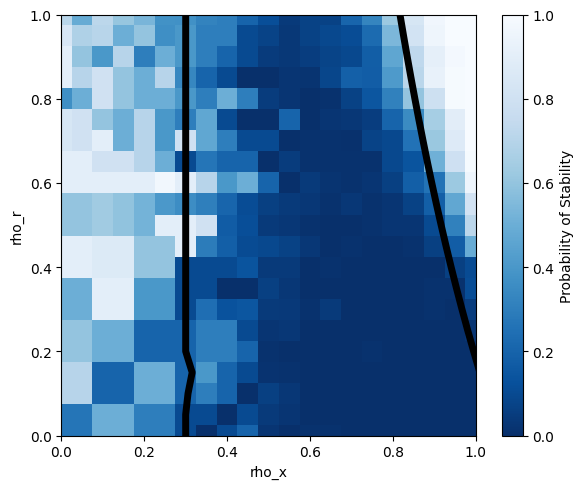

In [33]:
# Create grid for pcolormesh
X, Y = np.meshgrid(rho_x, rho_r)  # X: columns, Y: rows


cmap = cm.get_cmap('Blues_r').copy()

plt.figure(figsize=(6, 5))
plt.pcolormesh(X, Y, ttv, cmap=cmap, shading='auto')
data=np.load('rho_nu_N_0 and f.npz')
rho_r=data['rho_r']
rho_x=data['rho_x']
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(rho_x,rho_r,color="black",linewidth=5)

data=np.load('eta_stability_eta1eta2_0_8_to_1_0).npz')

rhox=data['arr_0'][2]
print(rhox)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(rhox,rho_r,color="black",linewidth=5)
plt.xlabel('rho_x')
plt.ylabel('rho_r')

plt.colorbar(label='Probability of Stability')
plt.tight_layout()
# plt.show()
plt.savefig("plot.svg",format="svg")
